In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from scipy.spatial.distance import hamming

In [18]:
train= np.asarray(Image.open('train.jpg').convert('L').resize((64,64)))
test1 = np.asarray(Image.open('test1.png').convert('L').resize((64,64)))
test2 = np.asarray(Image.open('test2.png').convert('L').resize((64,64)))
test3 = np.asarray(Image.open('test3.png').convert('L').resize((64,64)))

In [19]:
train = np.where(train > 100, 1, -1)
test1 = np.where(test1 > 100, 1, -1)
test2 = np.where(test2 > 100, 1, -1)
test3 = np.where(test3 > 100, 1, -1)

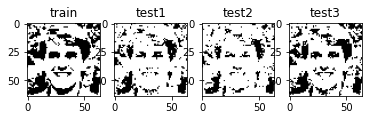

In [20]:
plt.subplot(1, 4, 1)
plt.imshow(train,cmap="gray")
plt.title('train')
plt.subplot(1, 4, 2)
plt.imshow(test1,cmap="gray")
plt.title('test1')
plt.subplot(1, 4, 3)
plt.imshow(test2,cmap="gray")
plt.title('test2')
plt.subplot(1, 4, 4)
plt.imshow(test3,cmap="gray")
plt.title('test3');

In [21]:
def dhn(test,train):
  w = np.outer(train.flatten(), train.flatten())
  d = np.zeros((4096, 4096), int) # Create matrix with only 0
  np.fill_diagonal(d, 1)
  w = w - d
  y = test.flatten()
  x = test.flatten()
  y_in = np.zeros(y.shape[0]) 
  k=0
  y_iteration = []
  hamming_distance = []
  for i in np.random.permutation(4096):
    k+=1
    y_in[i] = x[i] + np.dot(y,w[:,i])
    if y_in[i] > 0 :
      y[i] = 1
    elif y_in[i] == 0:
      y[i] = y[i]
    elif y_in[i] < 0 :
      y[i] = -1
    hamming_distance.append(hamming(y.flatten(), train.flatten())) 
    if k%50 == 0:
      plt.imshow(y.reshape(64,64),cmap="gray")
      plt.title('iteration : {}'.format(k))
      plt.show()
      
  return hamming_distance,w

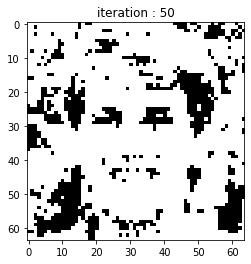

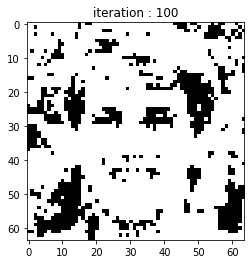

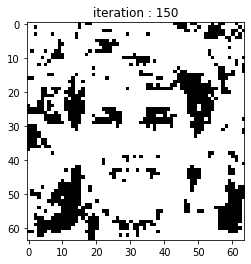

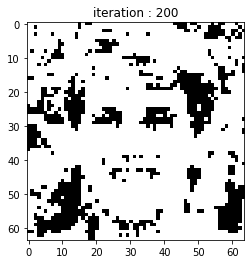

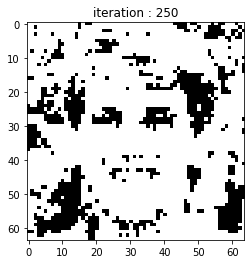

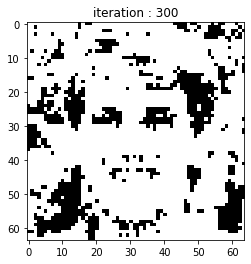

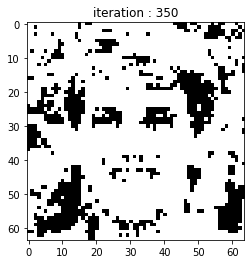

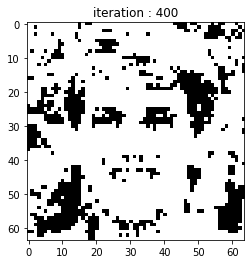

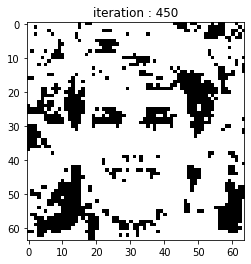

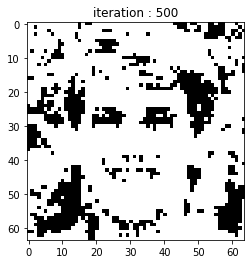

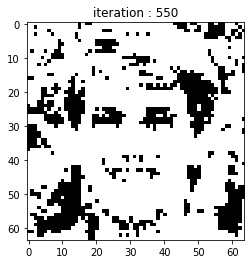

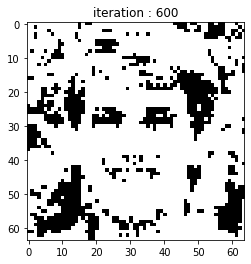

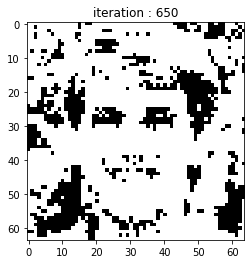

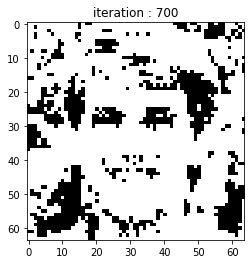

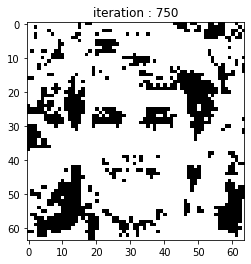

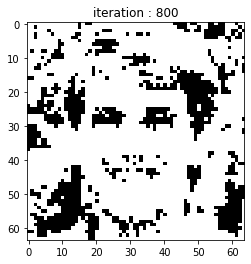

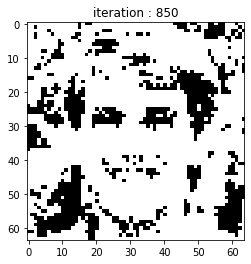

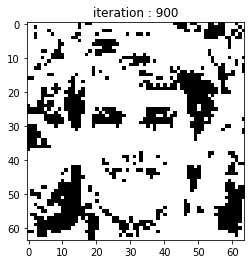

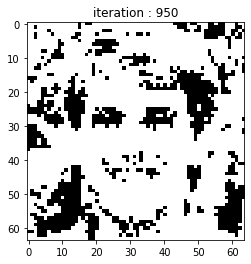

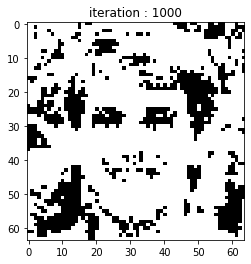

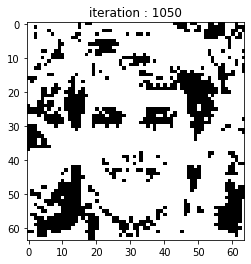

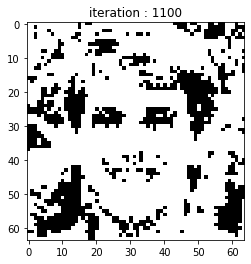

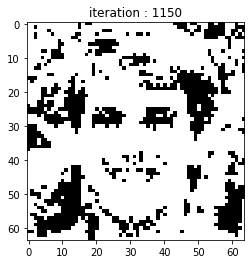

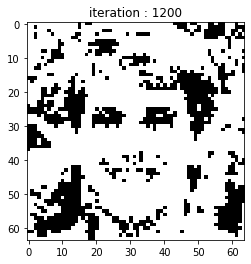

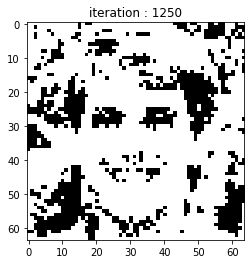

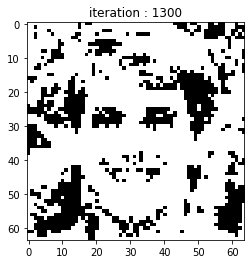

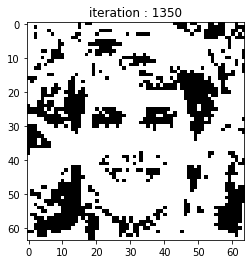

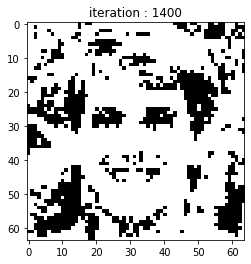

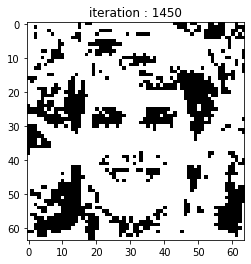

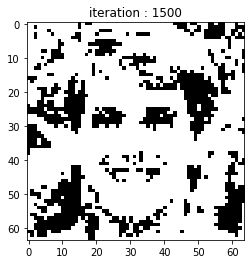

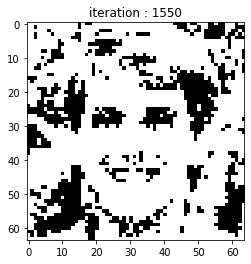

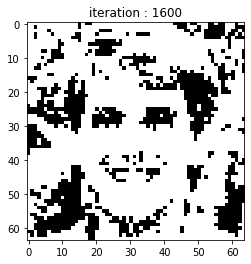

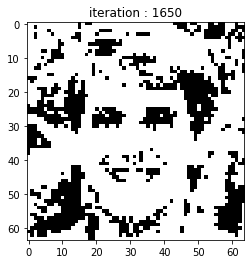

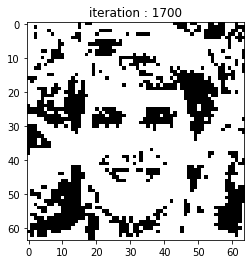

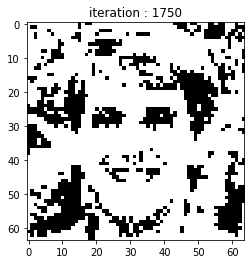

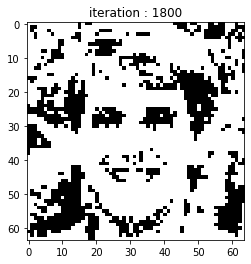

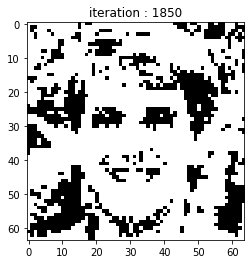

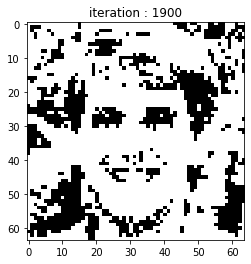

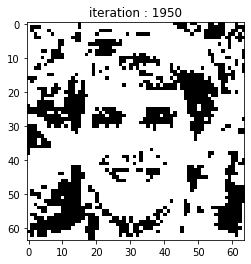

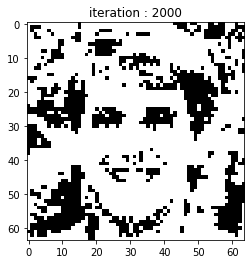

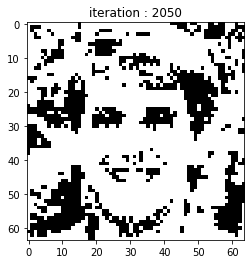

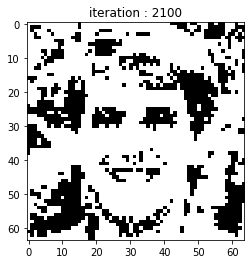

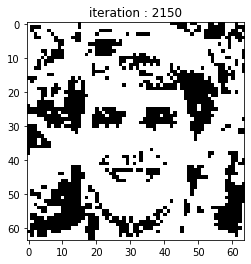

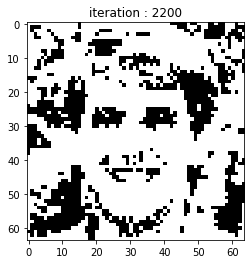

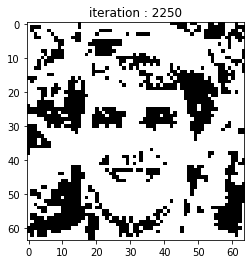

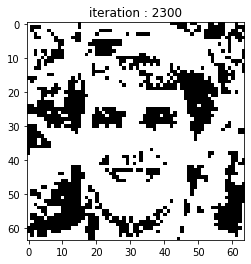

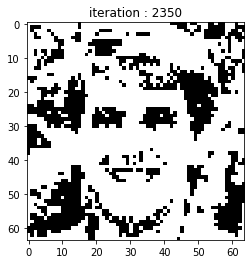

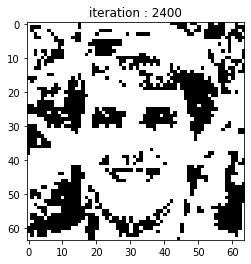

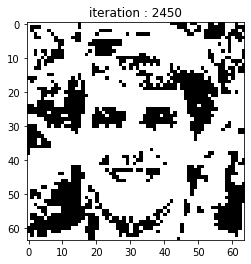

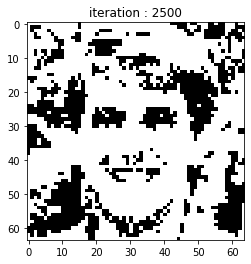

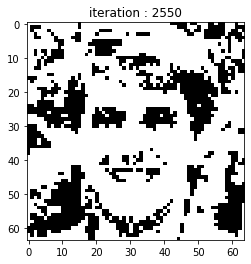

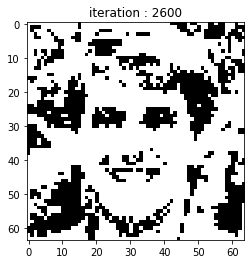

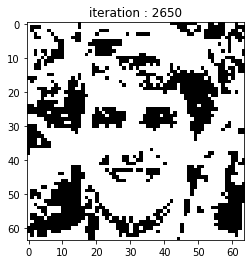

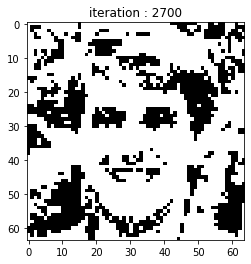

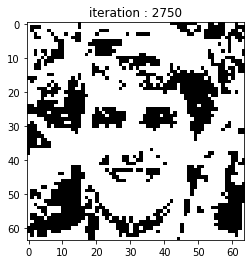

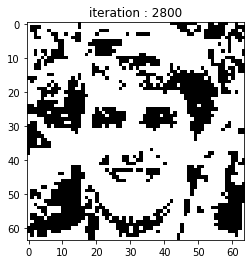

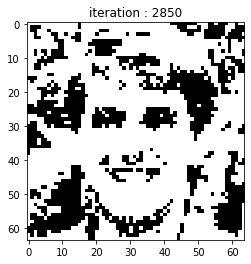

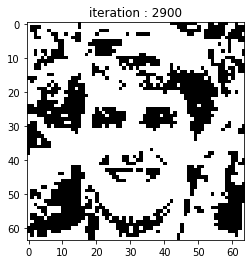

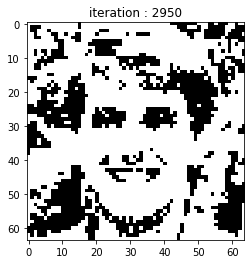

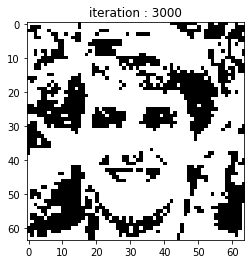

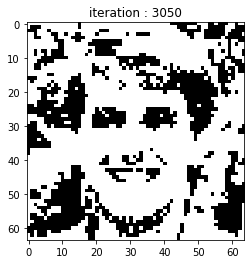

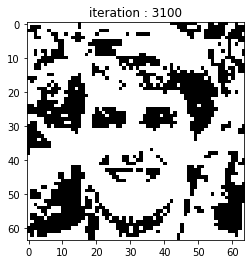

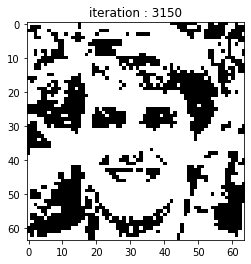

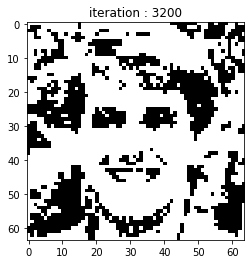

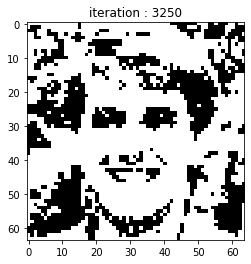

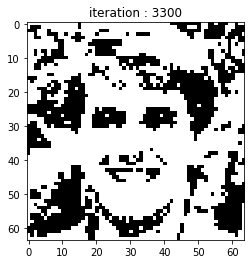

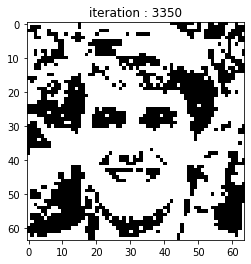

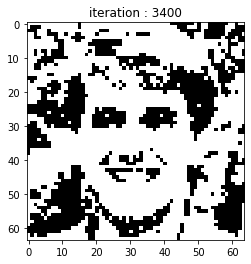

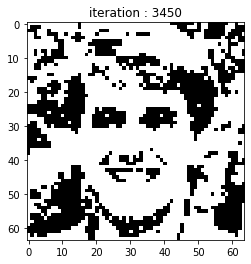

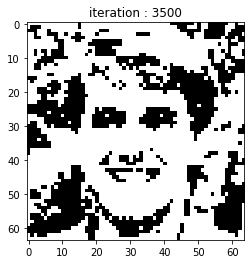

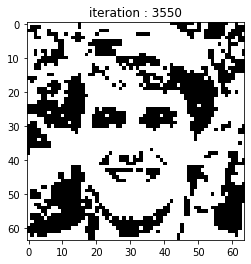

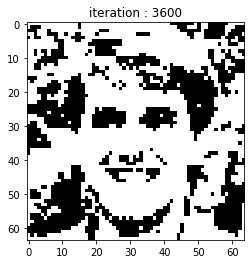

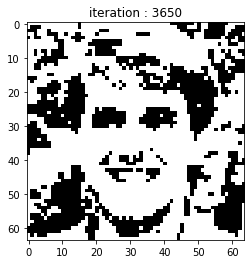

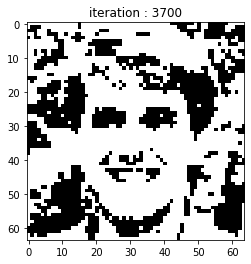

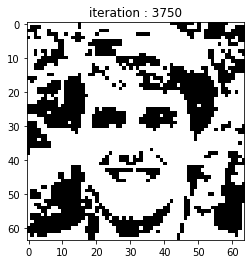

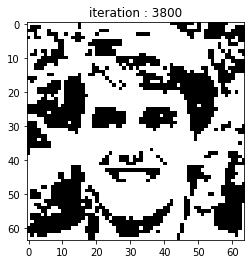

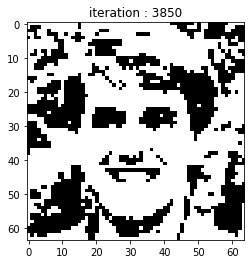

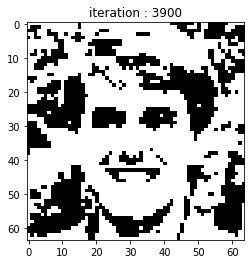

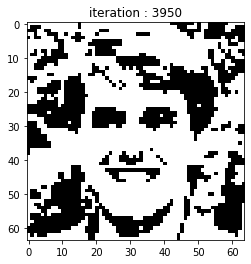

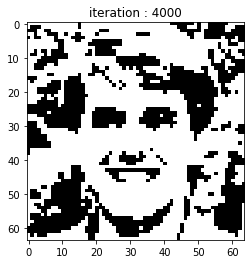

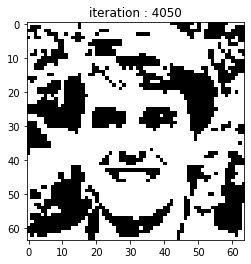

In [23]:
hamming_distance_test1,w = dhn(test1,train)

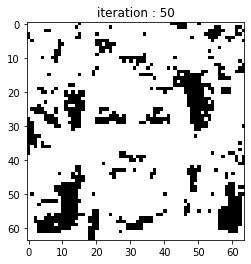

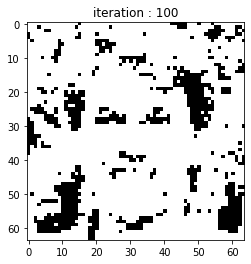

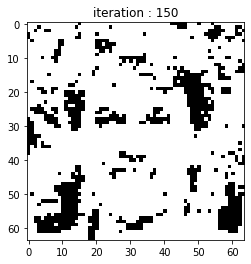

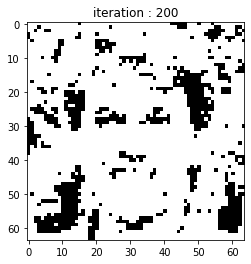

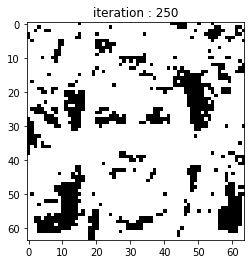

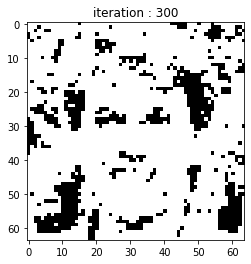

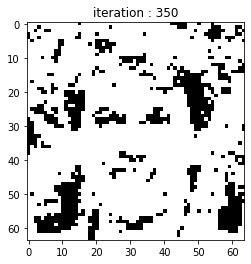

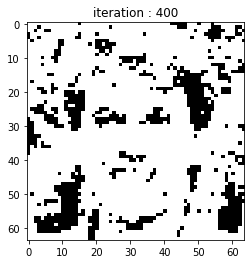

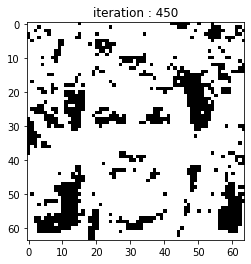

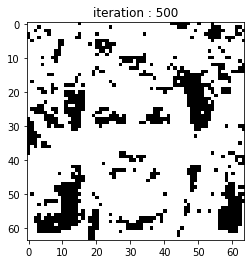

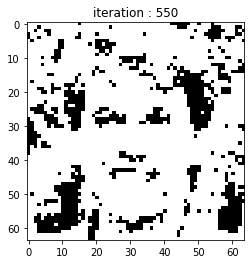

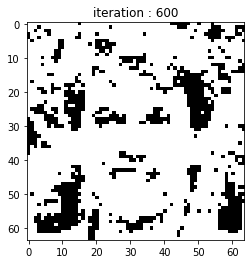

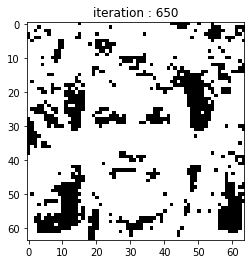

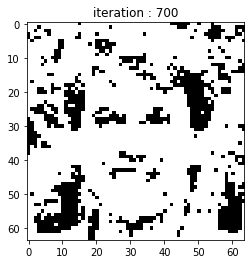

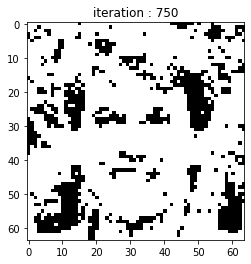

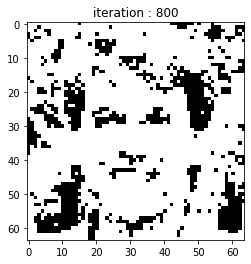

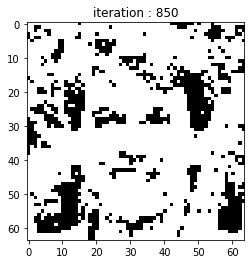

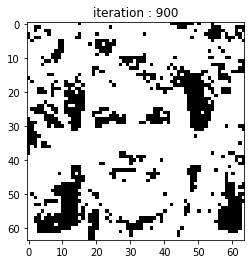

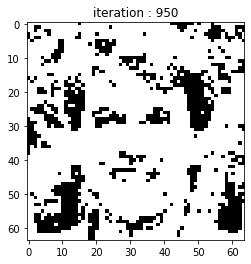

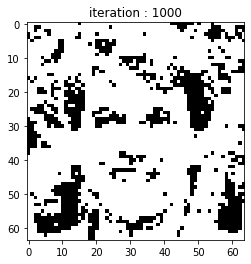

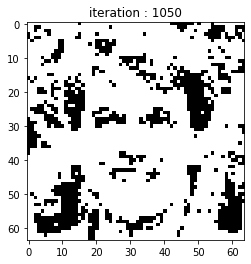

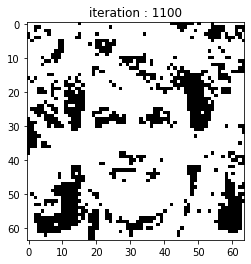

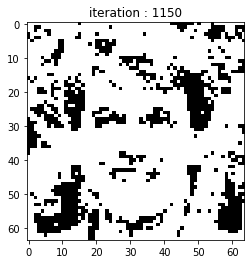

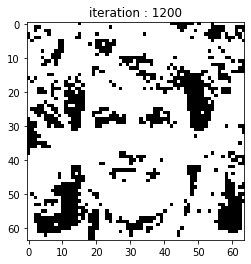

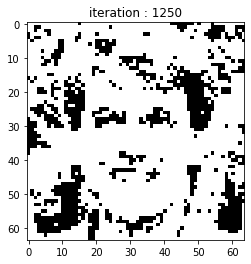

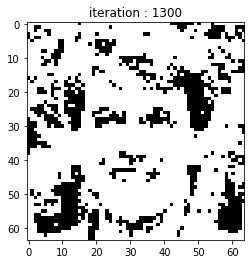

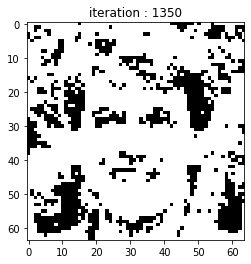

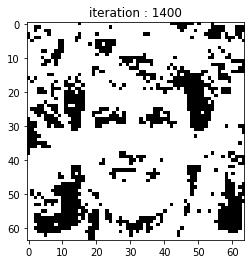

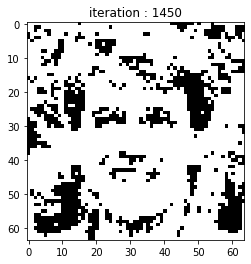

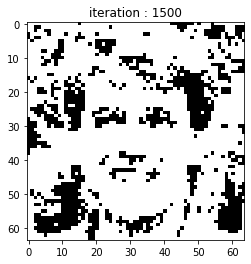

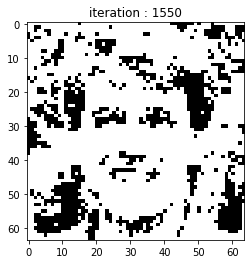

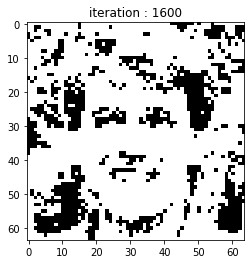

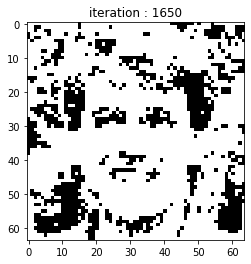

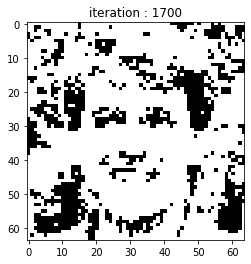

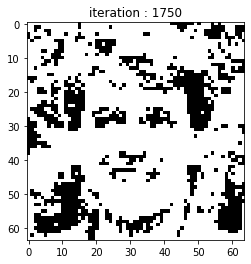

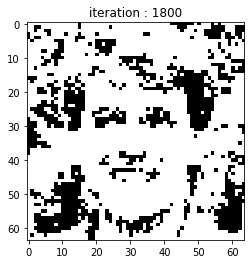

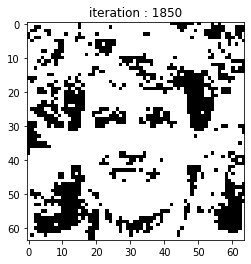

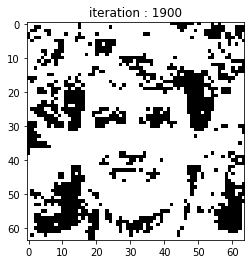

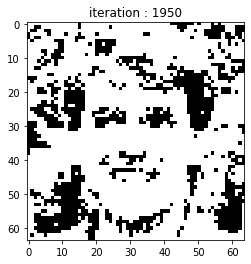

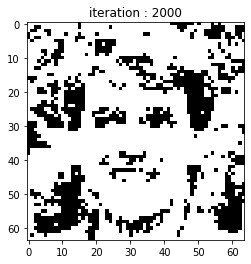

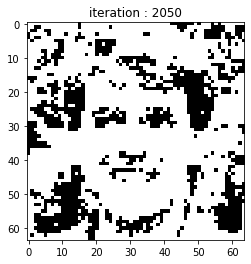

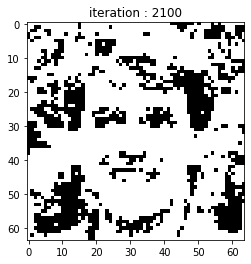

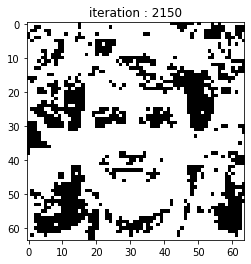

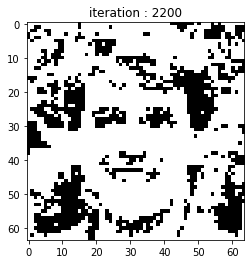

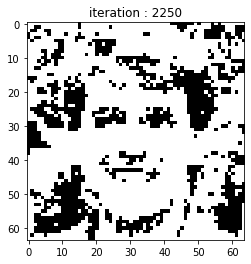

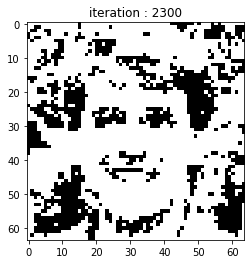

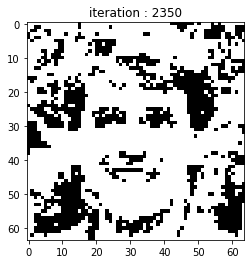

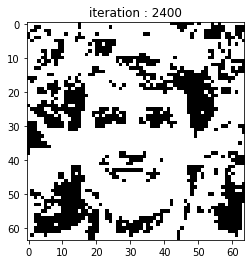

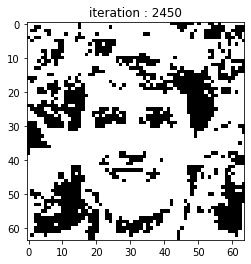

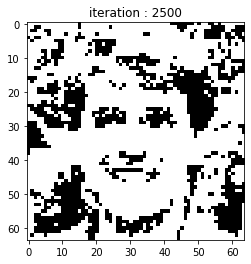

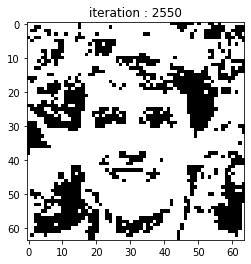

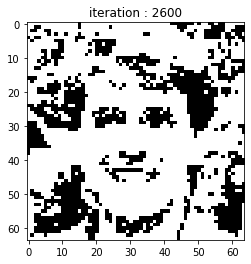

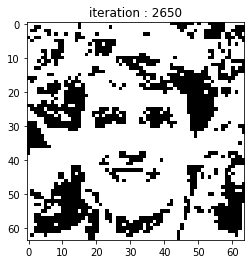

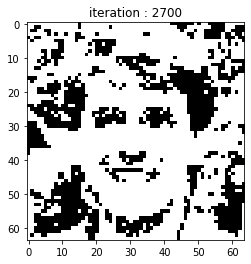

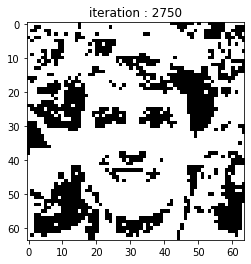

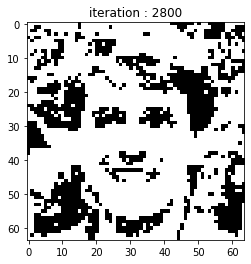

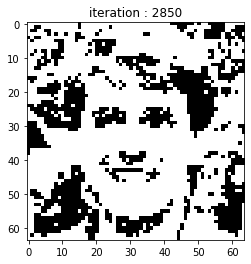

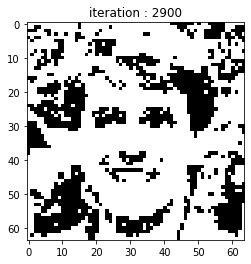

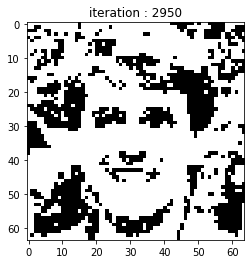

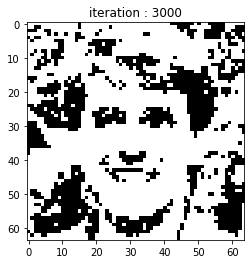

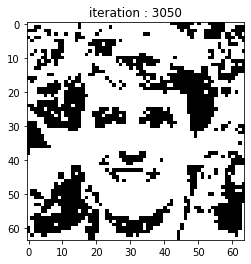

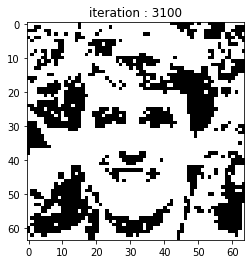

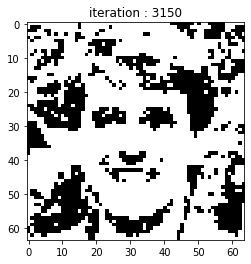

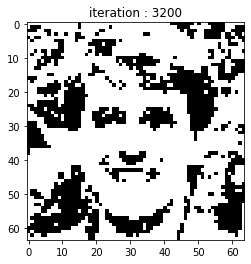

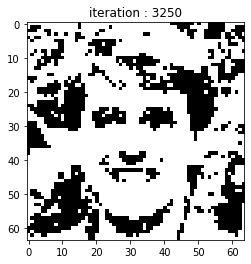

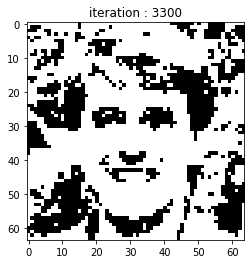

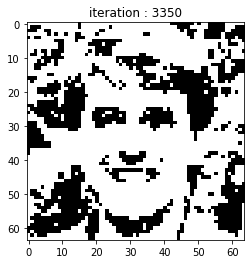

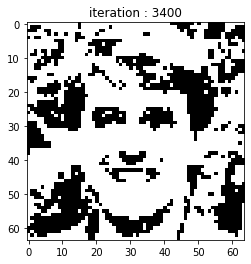

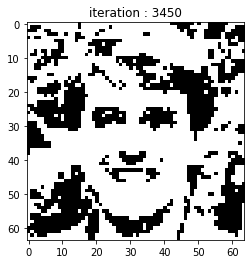

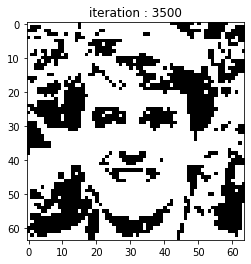

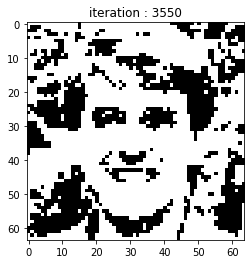

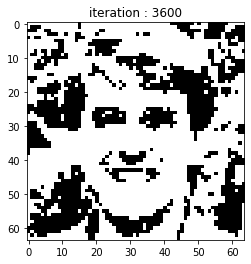

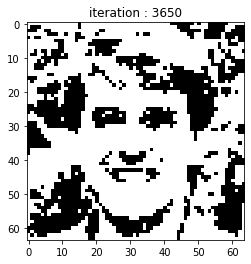

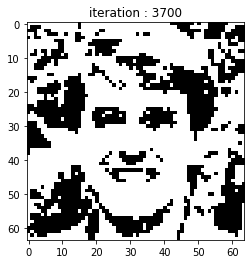

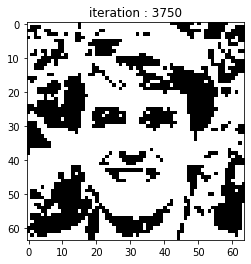

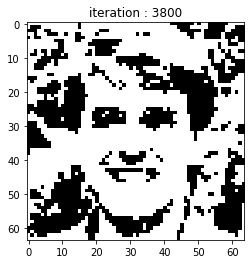

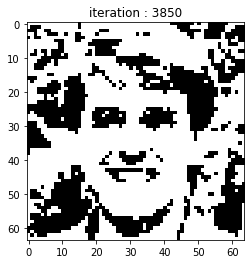

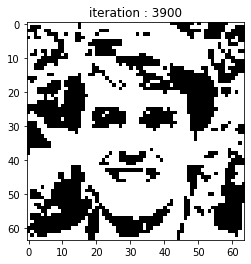

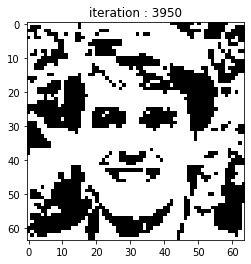

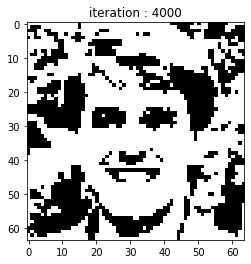

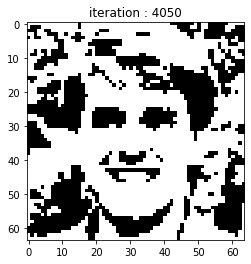

In [24]:
hamming_distance_test2,w = dhn(test2,train)

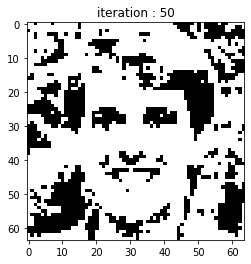

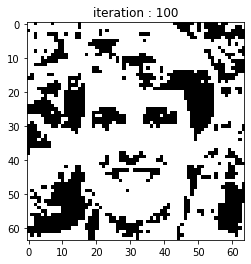

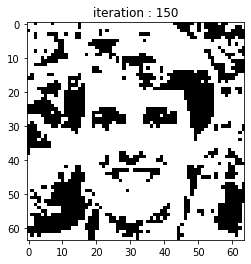

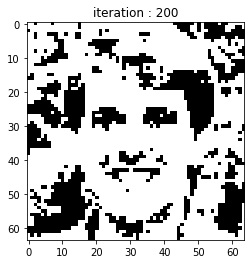

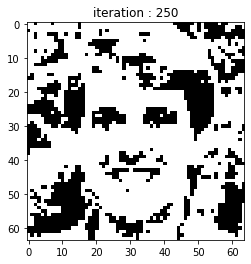

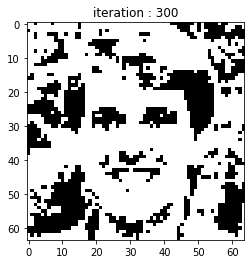

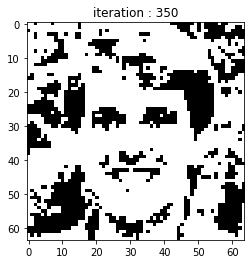

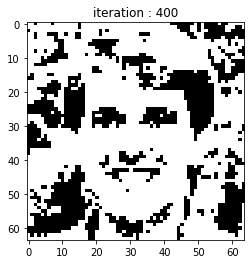

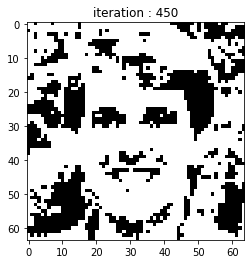

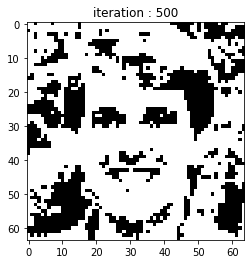

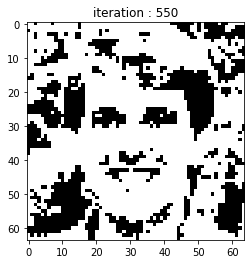

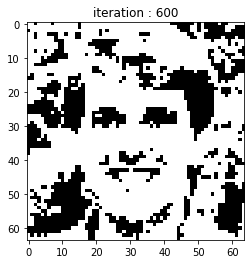

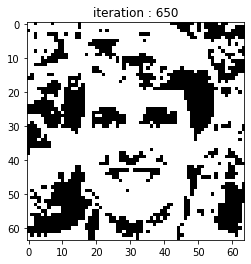

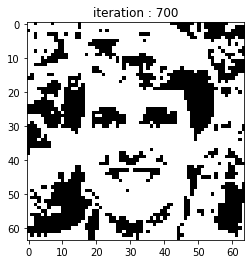

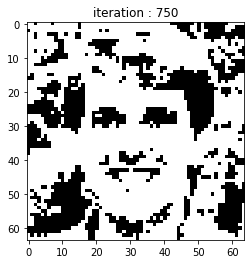

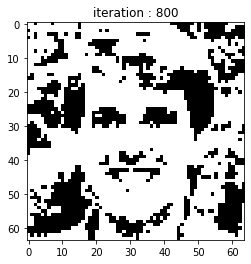

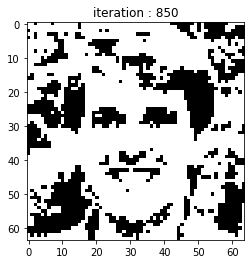

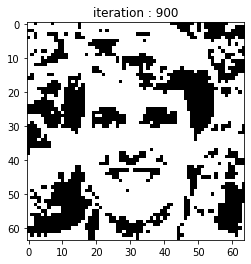

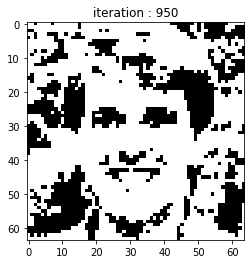

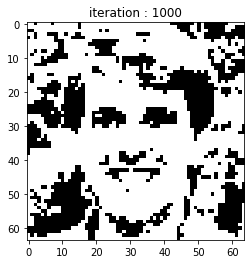

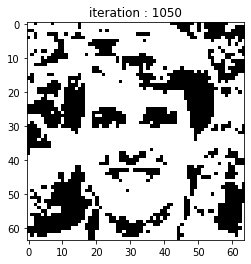

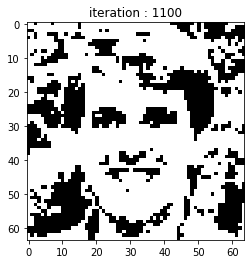

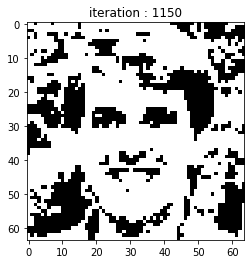

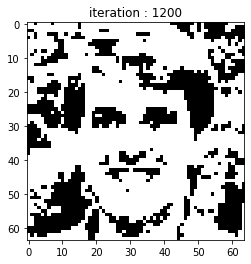

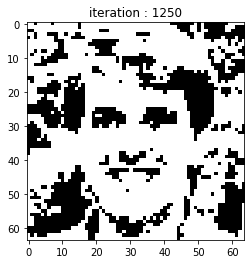

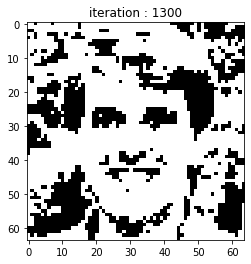

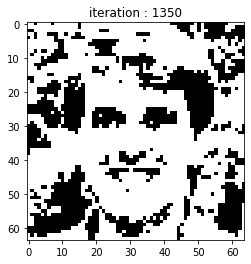

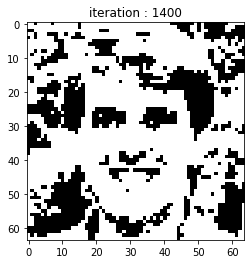

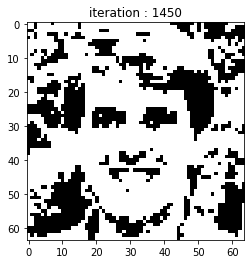

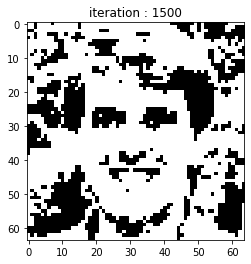

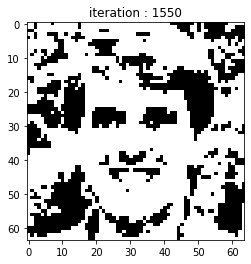

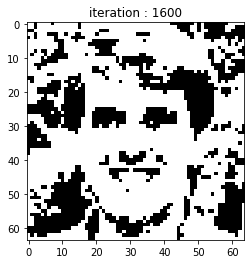

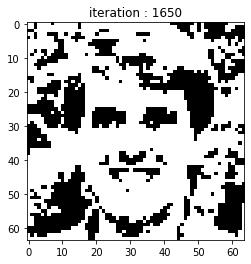

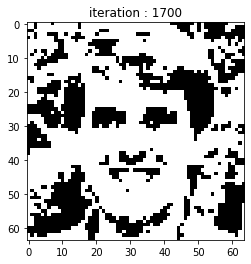

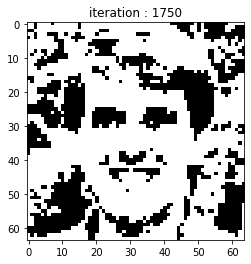

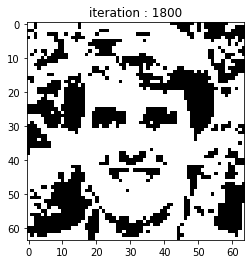

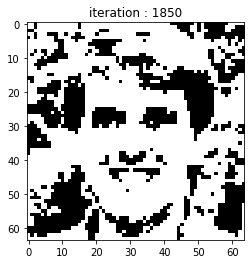

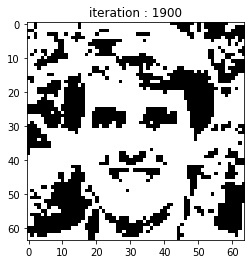

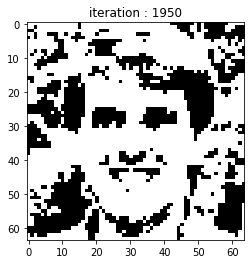

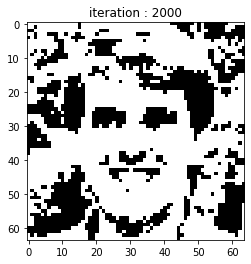

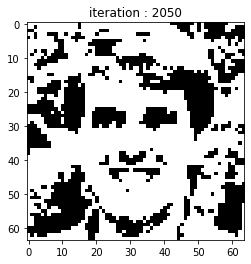

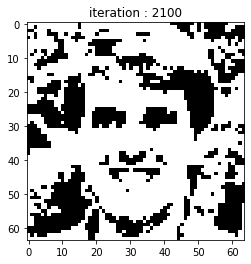

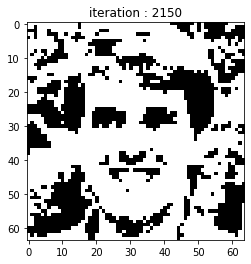

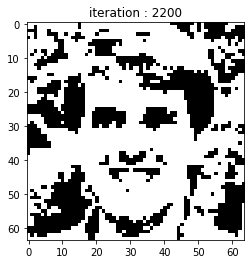

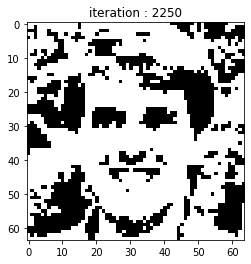

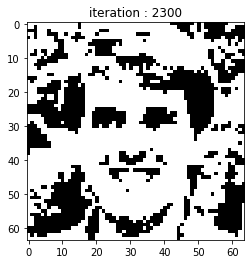

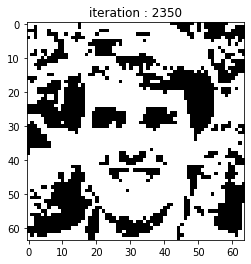

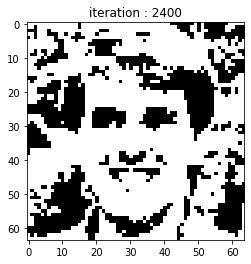

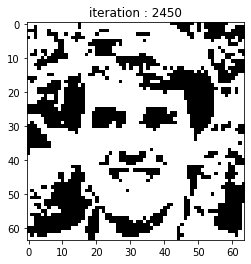

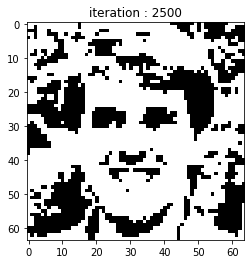

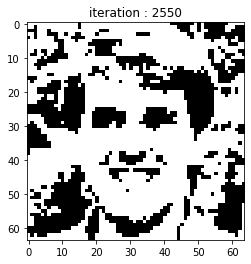

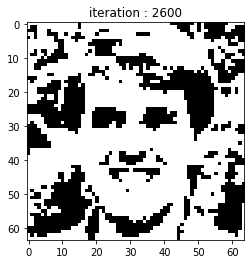

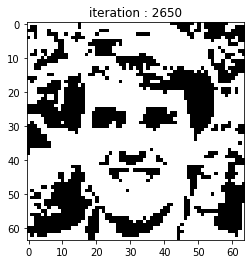

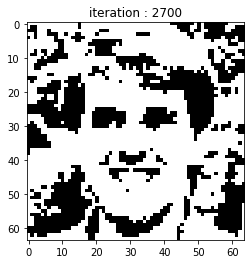

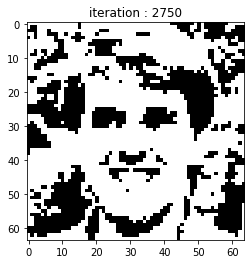

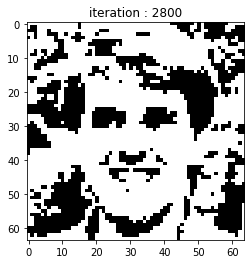

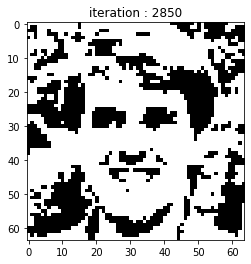

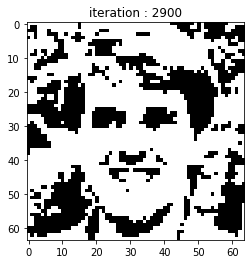

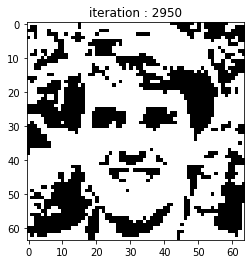

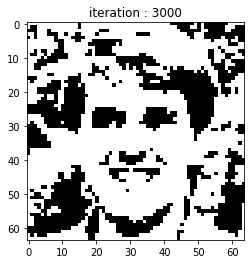

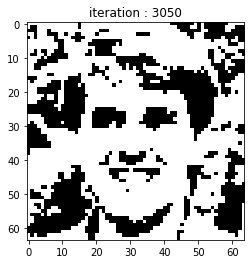

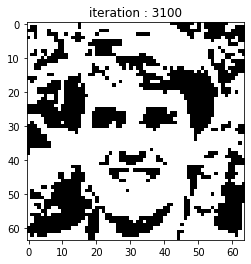

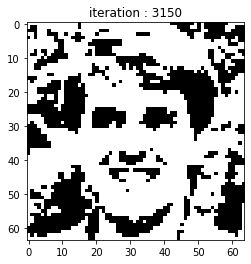

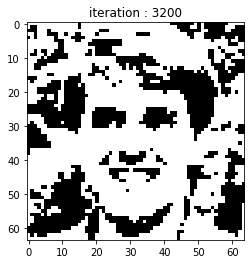

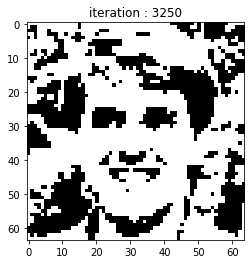

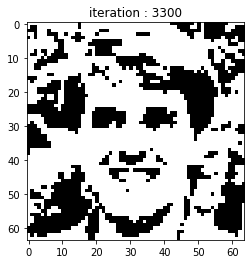

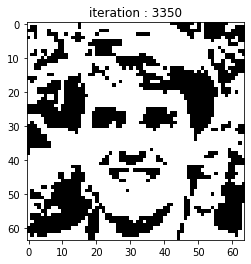

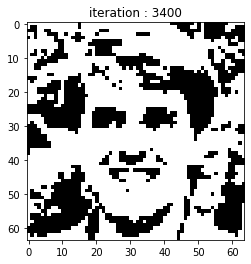

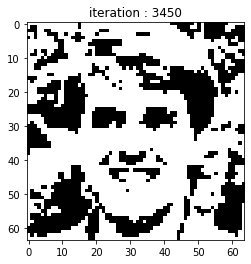

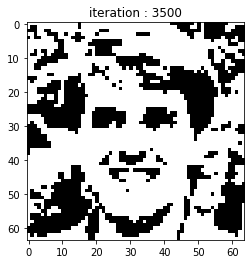

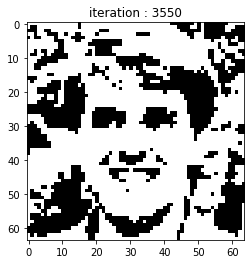

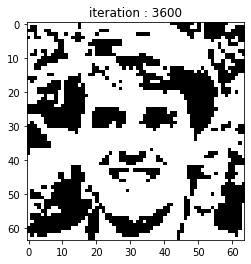

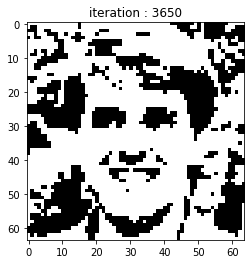

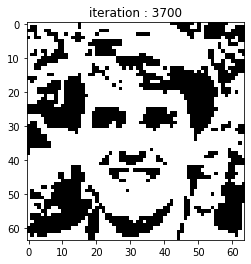

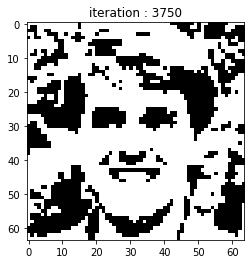

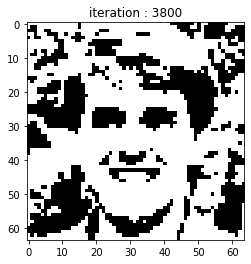

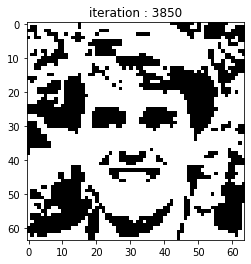

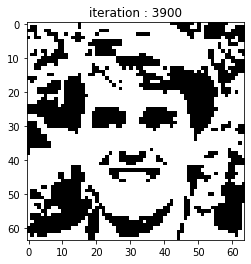

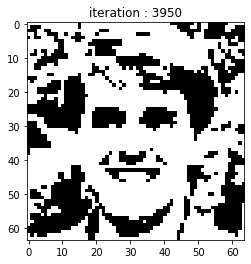

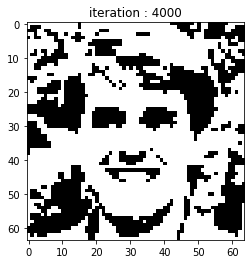

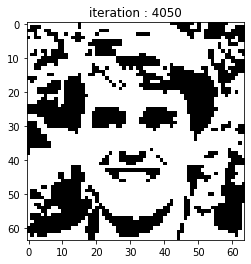

In [25]:
hamming_distance_test3,w = dhn(test3,train)

In [26]:
w

array([[0, 1, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0]])

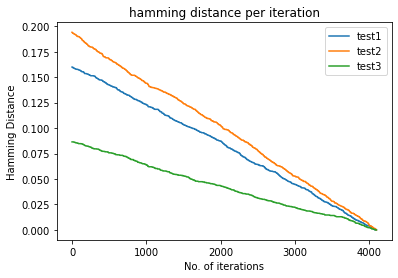

In [27]:
plt.plot(hamming_distance_test1,label='test1')
plt.plot(hamming_distance_test2,label='test2')
plt.plot(hamming_distance_test3,label='test3')
plt.legend()
plt.title('hamming distance per iteration')
plt.xlabel('No. of iterations')
plt.ylabel('Hamming Distance')
plt.show()